In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import warnings
warnings.filterwarnings("ignore")

# Project 
## Prediction Podcast Listening Time 

In [2]:
train=pd.read_csv(r"/kaggle/input/playground-series-s5e4/train.csv")
test=pd.read_csv(r"/kaggle/input/playground-series-s5e4/test.csv")
submission=pd.read_csv(r"/kaggle/input/playground-series-s5e4/sample_submission.csv")

# Data INFO 

In [3]:
train.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [4]:
train.shape

(750000, 12)

In [5]:
test.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
0,750000,Educational Nuggets,Episode 73,78.96,Education,38.11,Saturday,Evening,53.33,1.0,Neutral
1,750001,Sound Waves,Episode 23,27.87,Music,71.29,Sunday,Morning,NaN,0.0,Neutral
2,750002,Joke Junction,Episode 11,69.10,Comedy,67.89,Friday,Evening,97.51,0.0,Positive
3,750003,Comedy Corner,Episode 73,115.39,Comedy,23.40,Sunday,Morning,51.75,2.0,Positive
4,750004,Life Lessons,Episode 50,72.32,Lifestyle,58.10,Wednesday,Morning,11.30,2.0,Neutral


In [6]:
test.shape

(250000, 11)

In [7]:
submission.head()

,id,Listening_Time_minutes
0,750000,45.437
1,750001,45.437
2,750002,45.437
3,750003,45.437
4,750004,45.437


In [8]:
submission.shape

(250000, 2)

# Data Handling & Cleaning

In [9]:
# Filling NaN values in both train and test dataset 
# Use mode from train for both train and test
train["Episode_Length_minutes"] = train["Episode_Length_minutes"].fillna(train["Episode_Length_minutes"].mode()[0])
test["Episode_Length_minutes"] = test["Episode_Length_minutes"].fillna(train["Episode_Length_minutes"].mode()[0])

train["Guest_Popularity_percentage"] = train["Guest_Popularity_percentage"].fillna(train["Guest_Popularity_percentage"].mode()[0])
test["Guest_Popularity_percentage"] = test["Guest_Popularity_percentage"].fillna(train["Guest_Popularity_percentage"].mode()[0])



In [10]:
train.duplicated().sum()
test.duplicated().sum()

0

In [11]:
# Drop only 'Episode_Title' — keep 'id' in both
train.drop(columns=["Episode_Title"], inplace=True)
test.drop(columns=["Episode_Title"], inplace=True)

# EDA, Machine learning & Visualization

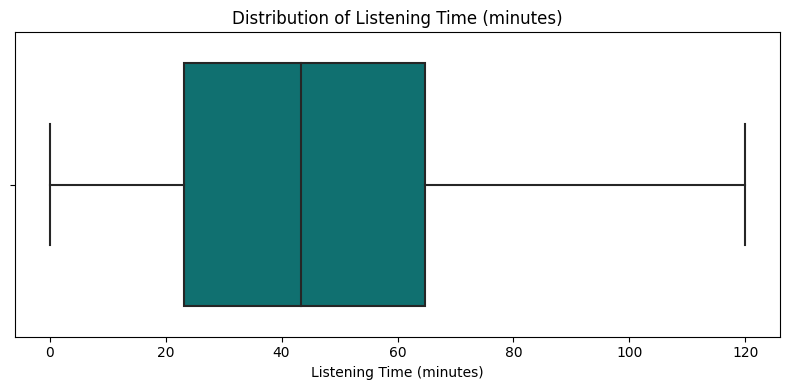

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.boxplot(x=train["Listening_Time_minutes"], color='teal')
plt.title("Distribution of Listening Time (minutes)")
plt.xlabel("Listening Time (minutes)")
plt.tight_layout()
plt.show()


In [13]:
train.head()

,id,Podcast_Name,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,6.60,True Crime,74.81,Thursday,Night,68.53,0.0,Positive,31.41998
1,1,Joke Junction,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [14]:
train.columns

Index(['id', 'Podcast_Name', 'Episode_Length_minutes', 'Genre',
       'Host_Popularity_percentage', 'Publication_Day', 'Publication_Time',
       'Guest_Popularity_percentage', 'Number_of_Ads', 'Episode_Sentiment',
       'Listening_Time_minutes'],
      dtype='object')

In [15]:
train.select_dtypes(include="number").columns

Index(['id', 'Episode_Length_minutes', 'Host_Popularity_percentage',
       'Guest_Popularity_percentage', 'Number_of_Ads',
       'Listening_Time_minutes'],
      dtype='object')

In [16]:
import pandas as pd

# ✅ Step 1: Specify categorical columns
cols_to_encode = ["Podcast_Name", "Genre", "Publication_Day", "Publication_Time", "Episode_Sentiment"]

# ✅ Step 2: Select numeric columns explicitly
num_cols = train[['id', 'Episode_Length_minutes', 'Host_Popularity_percentage',
                  'Guest_Popularity_percentage', 'Number_of_Ads', 'Listening_Time_minutes']]

# ✅ Step 3: Apply pd.get_dummies to encode categorical columns
encoded_cat = pd.get_dummies(train[cols_to_encode], drop_first=True).astype("int")

# ✅ Step 4: Concatenate encoded categorical columns with numeric columns
train_fdf = pd.concat([encoded_cat, num_cols], axis=1)

# Encode categorical columns in test set
test_encoded = pd.get_dummies(test[cols_to_encode], drop_first=True)

# Align with training columns
test_encoded = test_encoded.reindex(columns=train_fdf.drop(columns=["Listening_Time_minutes"]).columns, fill_value=0)

# Convert to int (optional safety)
test_encoded = test_encoded.astype("int")

# ✅ Step 5: Check final shape or preview
print("Final shape:", train_fdf.shape)
train_fdf.head()
train_fdf.isna().sum()
train_fdf.dropna(inplace=True)
train_fdf.head()

Final shape: (750000, 73)


,Podcast_Name_Brain Boost,Podcast_Name_Business Briefs,Podcast_Name_Business Insights,Podcast_Name_Comedy Corner,Podcast_Name_Crime Chronicles,Podcast_Name_Criminal Minds,Podcast_Name_Current Affairs,Podcast_Name_Daily Digest,Podcast_Name_Detective Diaries,Podcast_Name_Digital Digest,...,Publication_Time_Morning,Publication_Time_Night,Episode_Sentiment_Neutral,Episode_Sentiment_Positive,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,6.60,74.81,68.53,0.0,31.41998
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,119.80,66.95,75.95,2.0,88.01241
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,73.90,69.97,8.97,0.0,44.92531
3,0,0,0,0,0,0,0,0,0,1,...,1,0,0,1,3,67.17,57.22,78.70,2.0,46.27824
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,4,110.51,80.07,58.68,3.0,75.61031


# Models

In [17]:
model_lr = LinearRegression()
model_rf = RandomForestRegressor()
model_gb = GradientBoostingRegressor()

# Linear Regression Model 

In [18]:
x=train_fdf.drop(columns=["Listening_Time_minutes"])
y=train_fdf["Listening_Time_minutes"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)
model_lr=LinearRegression()
model_lr.fit(x_train_scaled,y_train)

LinearRegression()

In [19]:
y_pred=model_lr.predict(x_test_scaled)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Output results
print("Mean Absolute Error (MAE):", round(mae, 2))
print("Mean Squared Error (MSE):", round(mse, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))
print("R² Score:", round(r2, 4))


Mean Absolute Error (MAE): 12.77
Mean Squared Error (MSE): 303.36
Root Mean Squared Error (RMSE): 17.42
R² Score: 0.5881


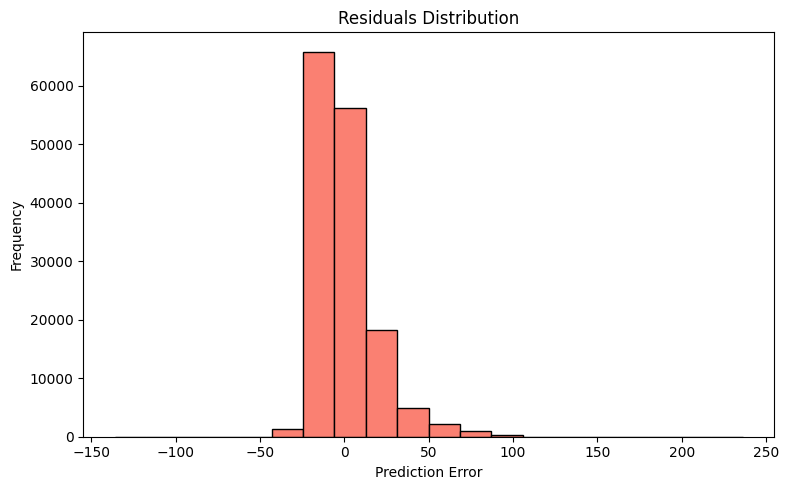

In [20]:
import matplotlib.pyplot as plt
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=20, color='salmon', edgecolor='black')
plt.title("Residuals Distribution")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [21]:

test_scaled = scaler.transform(test_encoded)
test_preds = model_lr.predict(test_scaled)

# fill in the submission file
submission["Listening_Time_minutes"] = test_preds

# save submission
submission.to_csv("my_submission.csv", index=False)